In [ ]:
#Code taken from github.com/sachinruk/deepschool.io 
#Lesson11

In [79]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [80]:
mnist = input_data.read_data_sets('./')

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [81]:
#I get 20 (28x28 pixels) images for x, and the corresponding labels x
x,y = mnist.train.next_batch(20)
num_pixels=x.shape[1]
width = 28
height =28

In [82]:
x.shape


(20, 784)

In [83]:
#the image is flatten, it is actually a 28x28 pixels picture
28*28


784

In [84]:
y.shape



(20,)

In [85]:
y

array([0, 8, 1, 9, 6, 5, 5, 9, 8, 2, 8, 1, 7, 9, 9, 6, 7, 2, 7, 1],
      dtype=uint8)

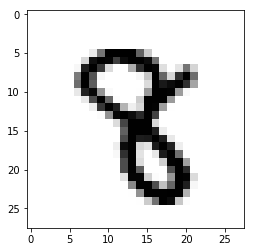

In [111]:
#I reshaped the input so that it can be visualized
plt.imshow(x[1].reshape((28,28)),cmap='Greys')
plt.show()

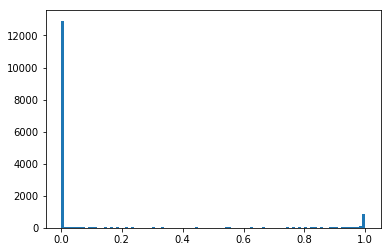

In [87]:
plt.hist(x.ravel(),100)
plt.show()

In [88]:
x_train, y_train = mnist.train.next_batch(10000)
x_test, y_test = mnist.train.next_batch(10000)

In [89]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
y_pred = logistic.predict(x_test)
y_pred[:10]

array([4, 8, 2, 5, 8, 1, 8, 1, 9, 6], dtype=uint8)

In [91]:
logistic.predict_proba(x_test[:])

array([[9.30101472e-05, 2.65275959e-04, 4.25014886e-02, ...,
        1.73518522e-02, 1.38135310e-03, 7.23147661e-03],
       [2.25567932e-02, 6.52282854e-06, 2.37378133e-03, ...,
        6.20779837e-06, 7.38680503e-01, 4.34423648e-06],
       [2.32167421e-04, 9.42125108e-06, 8.77904680e-01, ...,
        7.88493542e-05, 3.50173123e-03, 2.78350456e-06],
       ...,
       [7.91976854e-01, 1.41687230e-10, 3.08979433e-07, ...,
        7.00146230e-05, 3.10325897e-03, 7.40676997e-05],
       [5.55212387e-04, 1.35622670e-11, 1.63069373e-03, ...,
        2.81759323e-07, 4.08776544e-06, 2.94462854e-06],
       [1.44410217e-06, 5.28922027e-01, 2.25049662e-01, ...,
        1.54174126e-06, 2.42033811e-01, 6.86229855e-05]])

In [92]:
np.count_nonzero(y_pred==y_test)/len(y_test)

0.8961

In [93]:
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x, y

In [94]:
#1 hidden layer convolutionnal neural network
model = Sequential()
model.add(Dense(units=50, input_dim=num_pixels, activation='relu'))
#10 ouputs because there are 10 classes
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer = 'adadelta', loss='sparse_categorical_crossentropy')

In [95]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 2s 7ms/step - loss: 0.5511


In [96]:
y_pred = model.predict_classes(x_test)
np.count_nonzero(y_pred == y_test)/len(y_test)

0.9056

In [97]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [98]:
#now lets use conv neural networks
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x.reshape((-1,28,28,1)), y

In [99]:

model = Sequential()
#padding='same' pads the image with zeros so that the kernel runs over the whole image
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [100]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                250890    
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


In [101]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 26s 122ms/step - loss: 0.3965


In [102]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.9352

In [103]:
#use pooling to save on computation time and notice
#that the number of parameters dropped
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [105]:

batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 28s 132ms/step - loss: 0.4477


In [106]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.9221

In [107]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [108]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 288)               0         
__________

In [109]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 64s 298ms/step - loss: 0.4790


In [110]:

y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.9601